tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/994 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Device set to use mps:0


                                                text  \
0                               proud of pandawara☹️   
1  how can the government didn't do anything abou...   
2          give appreciation to the pandawara team👏🏻   
3                              respect for pandawara   
4                               The best pandawara 😇   
5                              pandawara is the best   
6                                         coooolllll   
7                                           good job   
8                      pandawara is the best forever   
9          proud of u pandawara ,, respect kakanda 🔥   

                                          clean_text sentiment_label  \
0                                 proud of pandawara        Positive   
1  how can the government didnt do anything about...         Neutral   
2            give appreciation to the pandawara team        Positive   
3                              respect for pandawara        Positive   
4                      

/var/folders/mw/d6pj95f17xn1pr6v_zm2dfv40000gn/T/ipykernel_20156/710769021.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2')


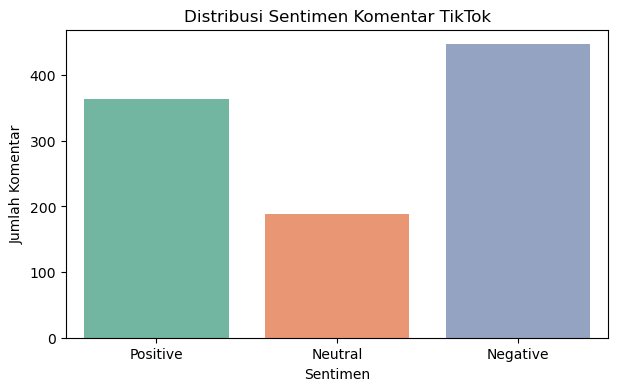

In [2]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load file JSON
with open("dataset_tiktok-comments-scraper_2025-05-09_01-15-36-897.json", encoding="utf-8") as f:
    data = json.load(f)

df = pd.json_normalize(data)

# Bersihkan komentar
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|#[\w\d]+", "", text)  # Hapus URL, mention, hashtag
    text = re.sub(r"[^\w\s]", "", text)               # Hapus tanda baca
    text = re.sub(r"\d+", "", text)                   # Hapus angka
    return text.strip()

df['clean_text'] = df['text'].astype(str).apply(clean_text)

# Load model sentimen Indonesia
model_id = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Prediksi sentimen per komentar
def predict_sentiment(text):
    result = sentiment_pipeline(text[:512])[0]  # Batasi max token BERT
    return pd.Series([result['label'], result['score']])

df[['sentiment_label', 'sentiment_score']] = df['clean_text'].apply(predict_sentiment)

# Tampilkan hasil
print(df[['text', 'clean_text', 'sentiment_label', 'sentiment_score']].head(10))

# Visualisasi distribusi
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='sentiment_label', palette='Set2')
plt.title("Distribusi Sentimen Komentar TikTok")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.show()

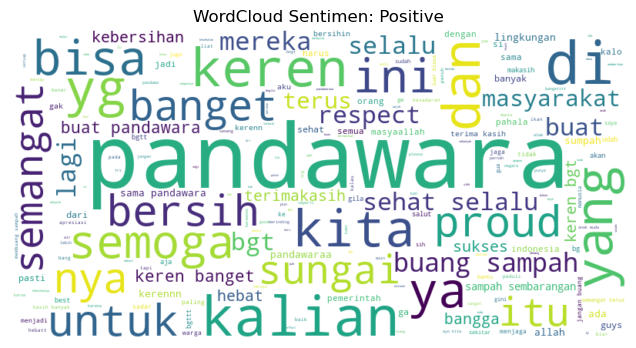

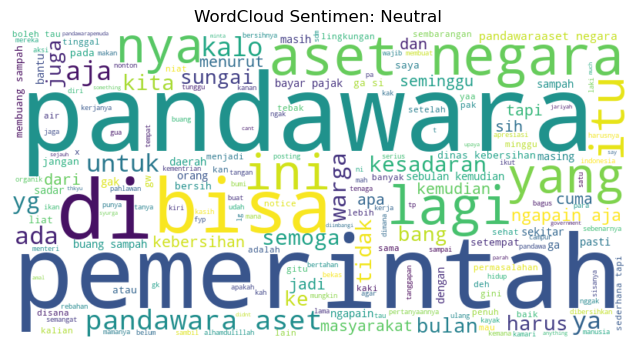

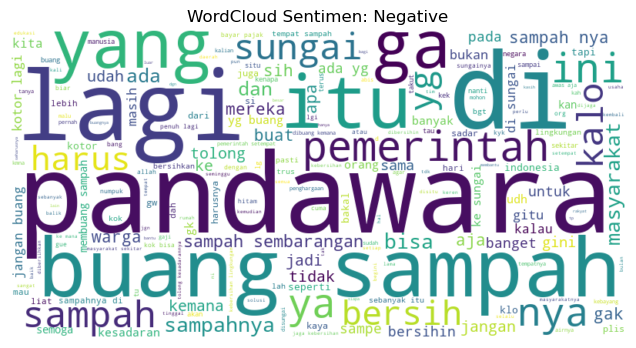

In [5]:
from wordcloud import WordCloud

for label in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment_label'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Sentimen: {label}")
    plt.show()

In [7]:
print("\nKomentar sangat positif:")
print(df[df['sentiment_score'] > 0.99][['text', 'sentiment_label', 'sentiment_score']].head())

print("\nKomentar sangat negatif:")
print(df[df['sentiment_score'] < 0.1][['text', 'sentiment_label', 'sentiment_score']].head())


Komentar sangat positif:
                                        text sentiment_label  sentiment_score
0                       proud of pandawara☹️        Positive         0.996959
3                      respect for pandawara        Positive         0.992101
7                                   good job        Positive         0.996771
8              pandawara is the best forever        Positive         0.992869
9  proud of u pandawara ,, respect kakanda 🔥        Positive         0.998248

Komentar sangat negatif:
Empty DataFrame
Columns: [text, sentiment_label, sentiment_score]
Index: []
